In [1]:
import numpy as np
import pandas as pd

tracks_genres = pd.read_csv('tracks_genres_mio.csv', index_col = 0, header = [0])

In [2]:
import librosa
import sklearn
import librosa.display
import matplotlib.pyplot as plt
from scipy import stats
import os.path

audio_dir = 'C:/Users/bonno/ProgettoBigData/fma_large'
dizionario = {}

#Imposto parametri per il calcolo
sr = 22050

#Voglio estrarre feature da ogni traccia
for track_id in tracks_genres.index:
    try:
        #Nome del file audio da caricare
        tid_str = '{:06d}'.format(track_id)
        filename = os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')
        
        x , sr = librosa.load(filename, sr=sr)

        #spec_centroid = librosa.feature.spectral_centroid(x, sr=sr, hop_length=hop_length, n_fft=n_fft)
        spec_centroid = librosa.feature.spectral_centroid(x, sr=sr)
            
        #spec_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, hop_length=hop_length, n_fft=n_fft, roll_percent=0.85)
        spec_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)
        
        spec_bandwidth = librosa.feature.spectral_bandwidth(x, sr=sr)

        media_centroid = np.mean(spec_centroid)
        deviaz_centroid= np.std(spec_centroid)
        massimo_centroid = np.amax(spec_centroid)
        minimo_centroid = np.amin(spec_centroid)
        mediana_centroid = np.median(spec_centroid)

        media_rolloff = np.mean(spec_rolloff)
        deviaz_rolloff= np.std(spec_rolloff)
        massimo_rolloff = np.amax(spec_rolloff)
        minimo_rolloff = np.amin(spec_rolloff)
        mediana_rolloff = np.median(spec_rolloff)

        media_bandwidth = np.mean(spec_bandwidth)
        deviaz_bandwidth= np.std(spec_bandwidth)
        massimo_bandwidth = np.amax(spec_bandwidth)
        minimo_bandwidth = np.amin(spec_bandwidth)
        mediana_bandwidth = np.median(spec_bandwidth)
        
        centroid_array = np.array([media_centroid, deviaz_centroid, massimo_centroid, minimo_centroid, mediana_centroid])
        rolloff_array = np.array([media_rolloff, deviaz_rolloff, massimo_rolloff, minimo_rolloff, mediana_rolloff])
        bandwidth_array = np.array([media_bandwidth, deviaz_bandwidth, massimo_bandwidth, minimo_bandwidth, mediana_bandwidth])

        concatened_array = np.concatenate((centroid_array, rolloff_array, bandwidth_array))

        dizionario[track_id] = concatened_array
    except:
        print('Oh no! Traccia numero' , track_id, ' non funziona')

c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh no! Traccia numero 1486  non funziona
Oh no! Traccia numero 5574  non funziona
Oh no! Traccia numero 12838  non funziona
Oh no! Traccia numero 29345  non funziona
Oh no! Traccia numero 29346  non funziona
Oh no! Traccia numero 29352  non funziona
Oh no! Traccia numero 29356  non funziona
Oh no! Traccia numero 33411  non funziona
Oh no! Traccia numero 33413  non funziona
Oh no! Traccia numero 33414  non funziona
Oh no! Traccia numero 33417  non funziona
Oh no! Traccia numero 33418  non funziona
Oh no! Traccia numero 33419  non funziona
Oh no! Traccia numero 33425  non funziona
Oh no! Traccia numero 50594  non funziona
Oh no! Traccia numero 53668  non funziona
Oh no! Traccia numero 54569  non funziona
Oh no! Traccia numero 54582  non funziona
Oh no! Traccia numero 65753  non funziona
Oh no! Traccia numero 80391  non funziona
Oh no! Traccia numero 94234  non funziona
Oh no! Traccia numero 98558  non funziona
Oh no! Traccia numero 98559  non funziona
Oh no! Traccia numero 98560  non fun

In [3]:
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

#Dichiaro i nomi delle colonne del DataFrame che voglio creare dal dizionario
lower_indexes = np.array(['mean','std','max','min','median'])
lower_indexes = np.tile(lower_indexes, 3)
upper_indexes = np.array([['centroid'],['rolloff'],['bandwidth']])
upper_indexes = np.repeat(upper_indexes, 5)

indexes_array = [upper_indexes,lower_indexes]
tuples = list(zip(*indexes_array))
index = pd.MultiIndex.from_tuples(tuples)

#Creo un DataFrame dal dizionario
centroid_rolloff_df = pd.DataFrame(data=dizionario.values(), index = dizionario.keys(), columns=index)
centroid_rolloff_df.index.name = 'track_id'

#Creo un altro DataFrame che ha i dati scalati con lo StandardScaler
scaler = StandardScaler()
scaled_cr = scaler.fit_transform(centroid_rolloff_df)

scaled_cr_df = pd.DataFrame(data=scaled_cr, index = dizionario.keys(), columns = index)
scaled_cr_df.index.name = 'track_id'

ipd.display(scaled_cr_df.head())

#Creo due file csv, uno con i dati scalati e uno con i dati "grezzi"
centroid_rolloff_df.to_csv('centroid_rolloff_bandwidth_not_scaled.csv')
scaled_cr_df.to_csv('centroid_rolloff_bandwidth.csv')

centroid                                           rolloff  \
              mean       std       max       min    median      mean   
track_id                                                               
2         1.563841  1.185701  1.641464  0.102641  1.327476  1.435921   
3         1.233154  0.907531  1.428662  0.827929  0.995685  1.149948   
5         0.668771  0.803214  0.836308  0.148566  0.588421  0.926089   
10        0.576088 -0.763418 -0.110365  1.520756  0.598926  0.190350   
134       0.692443  1.152229  1.130403 -0.209208  0.457676  0.699323   

                                                 bandwidth            \
               std       max       min    median      mean       std   
track_id                                                               
2         0.297062  0.958256  0.177654  1.253224  1.563841  1.185701   
3         0.299749  0.876322  0.929494  1.018556  1.233154  0.907531   
5         0.427321  1.069453  0.312600  0.993186  0.668771  0.803214   
10       -0.782087  0.016008  1.469276  0.111593  0.576088 -0.763418   
134       0.879169  0.893879 -0.246460  0.549218  0.692443  1.152229   

                                        
               max       min    median  
track_id                                
2         1.641464  0.102641  1.327476  
3         1.428662  0.827929  0.995685  
5         0.836308  0.148566  0.588421  
10       -0.110365  1.520756  0.598926  
134       1.130403 -0.209208  0.457676

In [5]:
import IPython.display as ipd

#Provo a fare un classificatore SVM utilizzando solo i valori dei centroid, rolloff e bandwidth come feature


X = pd.read_csv('centroid_rolloff_bandwidth.csv', index_col = 0, header = [0,1])

tracks_genres = pd.read_csv('tracks_genres.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']
ipd.display(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

centroid                                           rolloff  \
              mean       std       max       min    median      mean   
track_id                                                               
2         1.631096  1.220817  1.637015  0.172626  1.406673  1.490342   
5         0.745815  0.831570  0.844434  0.219866  0.670958  0.990612   
10        0.654145 -0.762748 -0.087454  1.631353  0.681415  0.269452   
140      -0.202337  1.330683  1.115982 -0.745173 -0.446125 -0.021615   
141      -0.333081  0.606019  1.197971 -0.533090 -0.375486 -0.373672   
...            ...       ...       ...       ...       ...       ...   
154308   -0.290698  0.473940  0.430023 -0.940267 -0.416458 -0.404376   
154309    0.982568  3.749951  2.126573 -0.127251  0.472231  0.665201   
154413   -0.779827  0.674118  0.995461 -1.256429 -0.704553 -0.765440   
154414    0.406847  0.989945  0.946952  0.033923  0.187603  0.471031   
155066   -1.986210 -0.959991 -0.880740 -1.199453 -1.976540 -2.036153   

                                                 bandwidth            \
               std       max       min    median      mean       std   
track_id                                                               
2         0.293743  0.951438  0.264597  1.316229  1.631096  1.220817   
5         0.425721  1.058837  0.405422  1.059979  0.745815  0.831570   
10       -0.799658  0.041373  1.612494  0.191230  0.654145 -0.762748   
140       1.780951  0.928828 -0.902238 -0.208769 -0.202337  1.330683   
141       0.537724  0.844039 -0.449586 -0.352519 -0.333081  0.606019   
...            ...       ...       ...       ...       ...       ...   
154308    0.629352  1.104058 -0.771472 -0.652519 -0.290698  0.473940   
154309    2.834740  0.974048 -0.218231  0.822479  0.982568  3.749951   
154413    1.388428  0.934480 -1.022945 -1.171268 -0.779827  0.674118   
154414    0.909280  0.742293 -0.258467  0.378730  0.406847  0.989945   
155066   -1.278772 -0.693463 -0.892179 -1.821268 -1.986210 -0.959991   

                                        
               max       min    median  
track_id                                
2         1.637015  0.172626  1.406673  
5         0.844434  0.219866  0.670958  
10       -0.087454  1.631353  0.681415  
140       1.115982 -0.745173 -0.446125  
141       1.197971 -0.533090 -0.375486  
...            ...       ...       ...  
154308    0.430023 -0.940267 -0.416458  
154309    2.126573 -0.127251  0.472231  
154413    0.995461 -1.256429 -0.704553  
154414    0.946952  0.033923  0.187603  
155066   -0.880740 -1.199453 -1.976540  

[7997 rows x 15 columns]

In [31]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')
# Fit data
clf = clf.fit(X_train, y_train)

['Instrumental' 'Rock' 'Experimental' ... 'Instrumental' 'Electronic'
 'Folk']


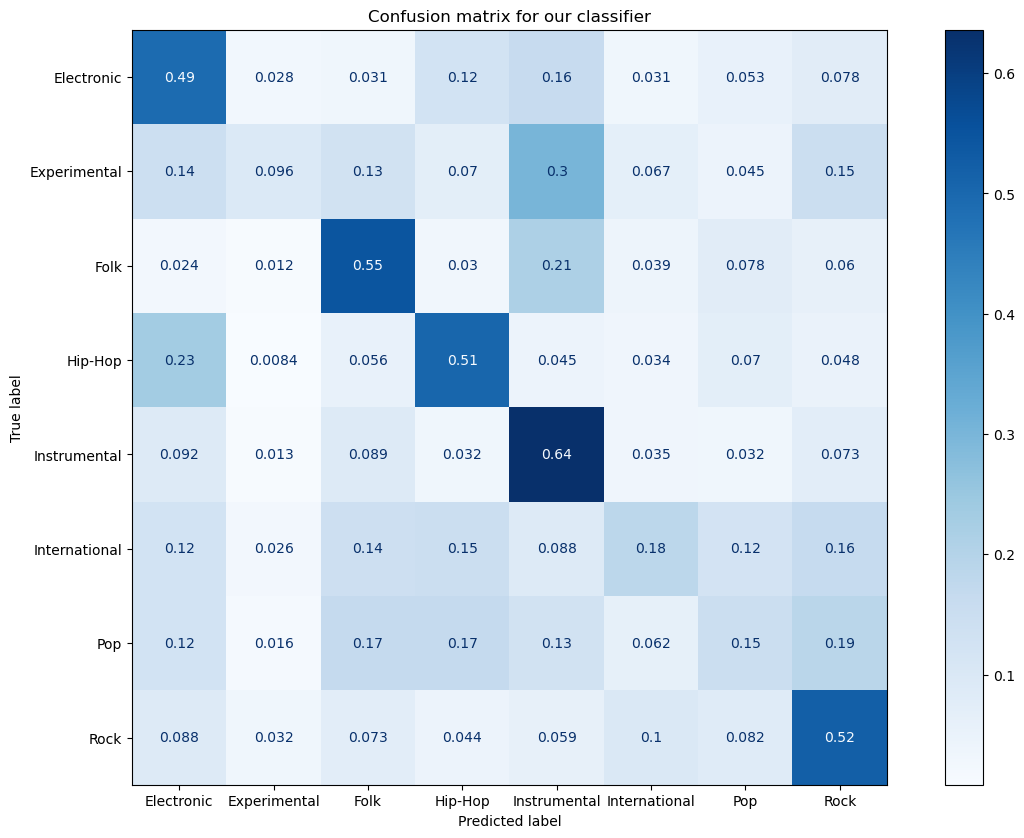

In [32]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

# Predict the test set
predictions = clf.predict(X_test)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

print(classification_report(y_test, predictions))

print("Accuracy: ", accuracy_score(y_test, predictions))